# Bike Share System

*Modeling and Simulation in Python*

Copyright 2021 Allen Downey

License: [Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International](https://creativecommons.org/licenses/by-nc-sa/4.0/)

In [1]:
# import functions from modsim
from modsim import *

In [2]:
def step(state, p1, p2, p3, p4, p5, p6):
    """Simulate one time step.
    
    state: bikeshare State object
    p1: probability of an A->B ride
    p2: probability of a B->A ride
    p3: probability of an A->C ride
    p4: probability of a C->A ride
    p5: probability of a B->C ride
    p6: probability of a C->B ride
    """
    if flip(p1):
        bike_A_to_B(state)
    
    if flip(p2):
        bike_B_to_A(state)
        
    if flip(p3):
        bike_A_to_C(state)
    
    if flip(p4):
        bike_C_to_A(state)
        
    if flip(p5):
        bike_B_to_C(state)
        
    if flip(p6):
        bike_C_to_B(state)
        
def bike_A_to_B(state):
    """Move one bike from A to B.
    
    state: bikeshare State object
    """
    if state.A == 0:
        state.A_empty += 1
        return
    state.A -= 1
    state.B += 1
    
def bike_B_to_A(state):
    """Move one bike from B to A.
    
    state: bikeshare State object
    """
    if state.B == 0:
        state.B_empty += 1
        return
    state.B -= 1
    state.A += 1
    
def bike_A_to_C(state):
    """Move one bike from A to C.
    
    state: bikeshare State object
    """
    if state.A == 0:
        state.A_empty += 1
        return
    state.A -= 1
    state.C += 1
    
def bike_C_to_A(state):
    """Move one bike from C to A.
    
    state: bikeshare State object
    """
    if state.C == 0:
        state.C_empty += 1
        return
    state.C -= 1
    state.A += 1
    
def bike_B_to_C(state):
    """Move one bike from B to C.
    
    state: bikeshare State object
    """
    if state.B == 0:
        state.B_empty += 1
        return
    state.B -= 1
    state.C += 1
    
def bike_C_to_B(state):
    """Move one bike from C to B.
    
    state: bikeshare State object
    """
    if state.C == 0:
        state.C_empty += 1
        return
    state.C -= 1
    state.B += 1


In [3]:
def run_simulation(state, p1, p2, p3, p4, p5, p6, num_steps, do_plot=True):
    """Simulate the given number of time steps.
    
    state: State object
    p1: probability of an A->B customer arrival
    p2: probability of a B->A customer arrival
    p3: probability of an A->C customer arrival
    p4: probability of a C->A customer arrival
    p5: probability of a B->C customer arrival
    p6: probability of a C->B customer arrival
    num_steps: number of time steps
    """
    results_A = TimeSeries()
    results_A[0] = state.A
    results_B = TimeSeries()
    results_B[0] = state.B
    results_C = TimeSeries()
    results_C[0] = state.C
    results_A_empty = TimeSeries()
    results_A_empty[0] = state.A_empty
    results_B_empty = TimeSeries()
    results_B_empty[0] = state.B_empty
    results_C_empty = TimeSeries()
    results_C_empty[0] = state.C_empty
    
    
    for i in range(num_steps):
        step(state, p1, p2, p3, p4, p5, p6)
        results_A[i+1] = state.A
        results_B[i+1] = state.B
        results_C[i+1] = state.C
        results_A_empty[i+1] = state.A_empty
        results_B_empty[i+1] = state.B_empty
        results_C_empty[i+1] = state.C_empty
        
    if (do_plot):
        fig, ax = plt.subplots(1,2,figsize=(12,6))
        ax[0].plot(results_A, label='A')
        ax[0].plot(results_B, label='B')
        ax[0].plot(results_C, label='C')
        ax[0].set_xlabel('Time step (min)')
        ax[0].set_ylabel('Number of bikes')
        ax[0].legend()
        ax[1].plot(results_A_empty, label='A')
        ax[1].plot(results_B_empty, label='B')
        ax[1].plot(results_C_empty, label='C')
        ax[1].set_xlabel('Time step (min)')
        ax[1].set_ylabel('Number of unsatisfied customers')
        ax[1].legend()
        plt.show()
    
    return results_A_empty[num_steps-1] + results_B_empty[num_steps-1] + results_C_empty[num_steps-1]

In [4]:
p_AB = 0.3
p_BA = 0.2
p_AC = 0.4
p_CA = 0.1
p_BC = 0.35
p_CB = 0.15

N_slots = 12

nstartA = []
nstartB = []
nstartC = []
tu_avg = []

num_sims = 10

for N_start_A in range(N_slots+1):

    for N_start_B in range(N_slots+1-N_start_A):
        
        nstartA.append(N_start_A)
        nstartB.append(N_start_B)
        
        N_start_C = N_slots - N_start_A - N_start_B
        
        nstartC.append(N_start_C)

        print(N_start_A, N_start_B, N_start_C)

        tu_sum = 0
    
        for j in range(num_sims):
            bikeshare = State(A=N_start_A, B=N_start_B, C=N_start_C, A_empty=0, B_empty=0, C_empty=0)
            do_plot = False
            total_unsatisfied = run_simulation(bikeshare, p_AB, p_BA, p_AC, p_CA, p_BC, p_CB, 100, do_plot)

            #print("Total unsatisfied customers: ", j, total_unsatisfied)
            tu_sum += total_unsatisfied
    
        print("Average unsatisfied customers: ", tu_sum/(1.0*num_sims))
        tu_avg.append(tu_sum/(1.0*num_sims))
    


0 0 12
Average unsatisfied customers:  78.9
0 1 11
Average unsatisfied customers:  85.9
0 2 10
Average unsatisfied customers:  83.7
0 3 9
Average unsatisfied customers:  82.0
0 4 8
Average unsatisfied customers:  82.2
0 5 7
Average unsatisfied customers:  74.4
0 6 6
Average unsatisfied customers:  76.4
0 7 5
Average unsatisfied customers:  78.1
0 8 4
Average unsatisfied customers:  73.3
0 9 3
Average unsatisfied customers:  69.4
0 10 2
Average unsatisfied customers:  68.1
0 11 1
Average unsatisfied customers:  73.4
0 12 0
Average unsatisfied customers:  72.0
1 0 11
Average unsatisfied customers:  76.2
1 1 10
Average unsatisfied customers:  80.5
1 2 9
Average unsatisfied customers:  86.2
1 3 8
Average unsatisfied customers:  78.7
1 4 7
Average unsatisfied customers:  69.7
1 5 6
Average unsatisfied customers:  75.5
1 6 5
Average unsatisfied customers:  66.1
1 7 4
Average unsatisfied customers:  76.0
1 8 3
Average unsatisfied customers:  66.0
1 9 2
Average unsatisfied customers:  65.6
1 1

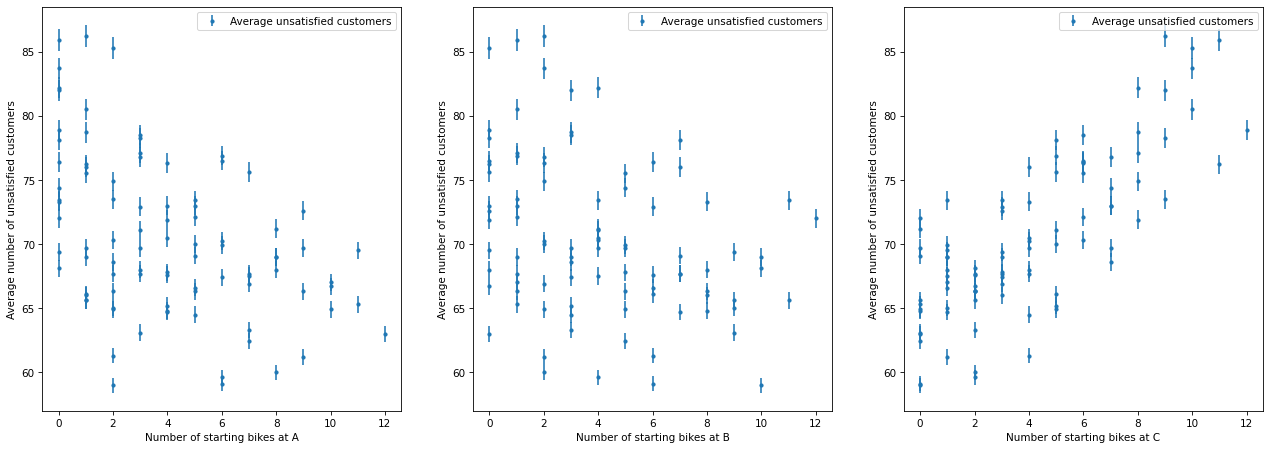

In [6]:
tu_avg_error = 0.01*np.array(tu_avg)

fig, ax = plt.subplots(1,3,figsize=(21,7))

ax[0].errorbar(nstartA, tu_avg, tu_avg_error, fmt='.', label='Average unsatisfied customers')
ax[0].set_xlabel('Number of starting bikes at A')
ax[0].set_ylabel('Average number of unsatisfied customers')
ax[0].legend()
ax[1].errorbar(nstartB, tu_avg, tu_avg_error, fmt='.', label='Average unsatisfied customers')
ax[1].set_xlabel('Number of starting bikes at B')
ax[1].set_ylabel('Average number of unsatisfied customers')
ax[1].legend()
ax[2].errorbar(nstartC, tu_avg, tu_avg_error, fmt='.', label='Average unsatisfied customers')
ax[2].set_xlabel('Number of starting bikes at C')
ax[2].set_ylabel('Average number of unsatisfied customers')
ax[2].legend()


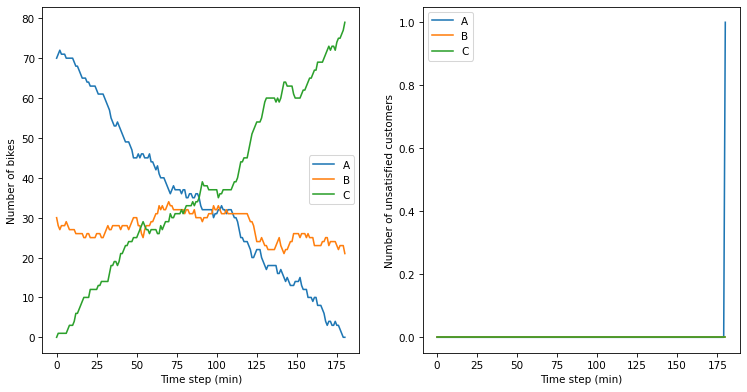

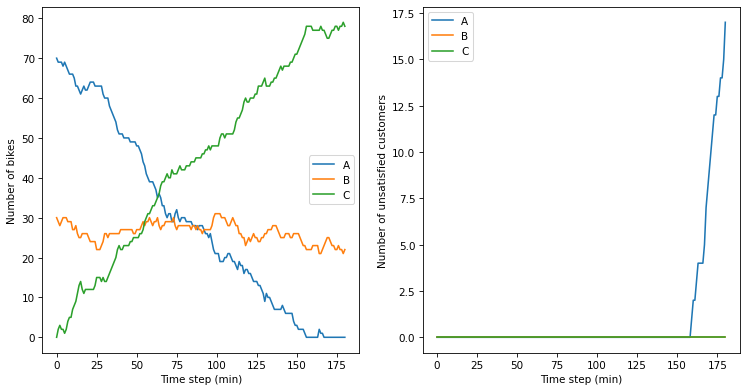

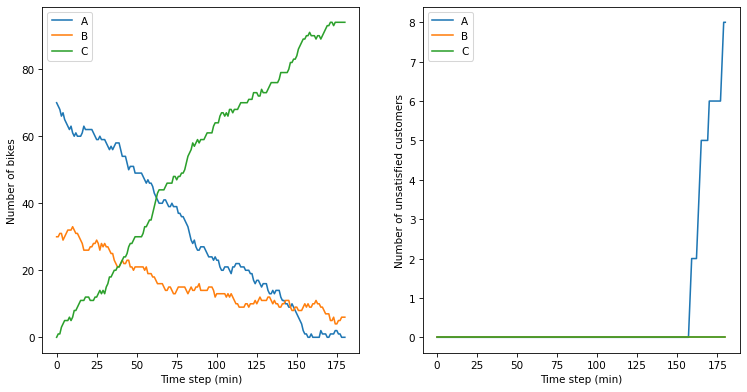

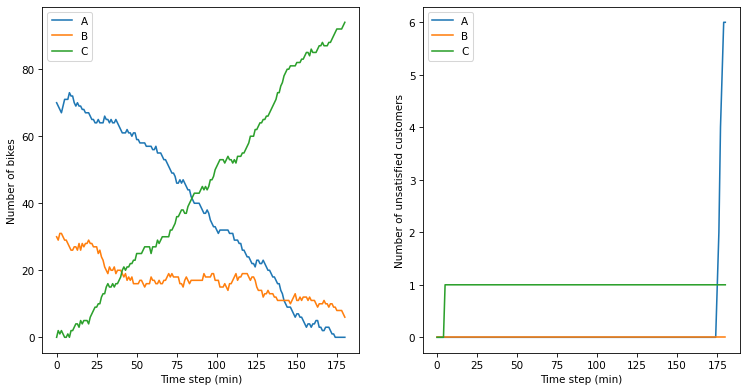

Average unsatisfied customers:  7.5


In [7]:
tu_sum = 0
num_sims = 4

N_slots = 100

N_start_A = 70
N_start_B = 30
N_start_C = 0
    
for j in range(num_sims):
    bikeshare = State(A=N_start_A, B=N_start_B, C=N_start_C, A_empty=0, B_empty=0, C_empty=0)
    do_plot = True
    total_unsatisfied = run_simulation(bikeshare, p_AB, p_BA, p_AC, p_CA, p_BC, p_CB, 180, do_plot)

    #print("Total unsatisfied customers: ", j, total_unsatisfied)
    tu_sum += total_unsatisfied
    
print("Average unsatisfied customers: ", tu_sum/(1.0*num_sims))

In [12]:
p_AB = 0.3
p_BA = 0.2
p_AC = 0.4
p_CA = 0.1
p_BC = 0.35
p_CB = 0.15

N_slots = 100

nstartA = []
nstartB = []
nstartC = []
tu_avg = []

num_sims = 10

N_start_C = 0

for N_start_A in range(50,N_slots+1,1):

        N_start_B = N_slots - N_start_A - N_start_C
        
        nstartA.append(N_start_A)
        nstartB.append(N_start_B)
        
        nstartC.append(N_start_C)

        print(N_start_A, N_start_B, N_start_C)

        tu_sum = 0
    
        for j in range(num_sims):
            bikeshare = State(A=N_start_A, B=N_start_B, C=N_start_C, A_empty=0, B_empty=0, C_empty=0)
            do_plot = False
            total_unsatisfied = run_simulation(bikeshare, p_AB, p_BA, p_AC, p_CA, p_BC, p_CB, 180, do_plot)

            #print("Total unsatisfied customers: ", j, total_unsatisfied)
            tu_sum += total_unsatisfied
    
        print("Average unsatisfied customers: ", tu_sum/(1.0*num_sims))
        tu_avg.append(tu_sum/(1.0*num_sims))
    


50 50 0
Average unsatisfied customers:  29.4
51 49 0
Average unsatisfied customers:  24.4
52 48 0
Average unsatisfied customers:  17.4
53 47 0
Average unsatisfied customers:  23.9
54 46 0
Average unsatisfied customers:  21.8
55 45 0
Average unsatisfied customers:  15.4
56 44 0
Average unsatisfied customers:  18.0
57 43 0
Average unsatisfied customers:  20.6
58 42 0
Average unsatisfied customers:  16.1
59 41 0
Average unsatisfied customers:  18.9
60 40 0
Average unsatisfied customers:  9.9
61 39 0
Average unsatisfied customers:  10.4
62 38 0
Average unsatisfied customers:  6.8
63 37 0
Average unsatisfied customers:  13.0
64 36 0
Average unsatisfied customers:  14.6
65 35 0
Average unsatisfied customers:  12.1
66 34 0
Average unsatisfied customers:  9.1
67 33 0
Average unsatisfied customers:  8.4
68 32 0
Average unsatisfied customers:  9.2
69 31 0
Average unsatisfied customers:  9.1
70 30 0
Average unsatisfied customers:  10.0
71 29 0
Average unsatisfied customers:  10.1
72 28 0
Average 

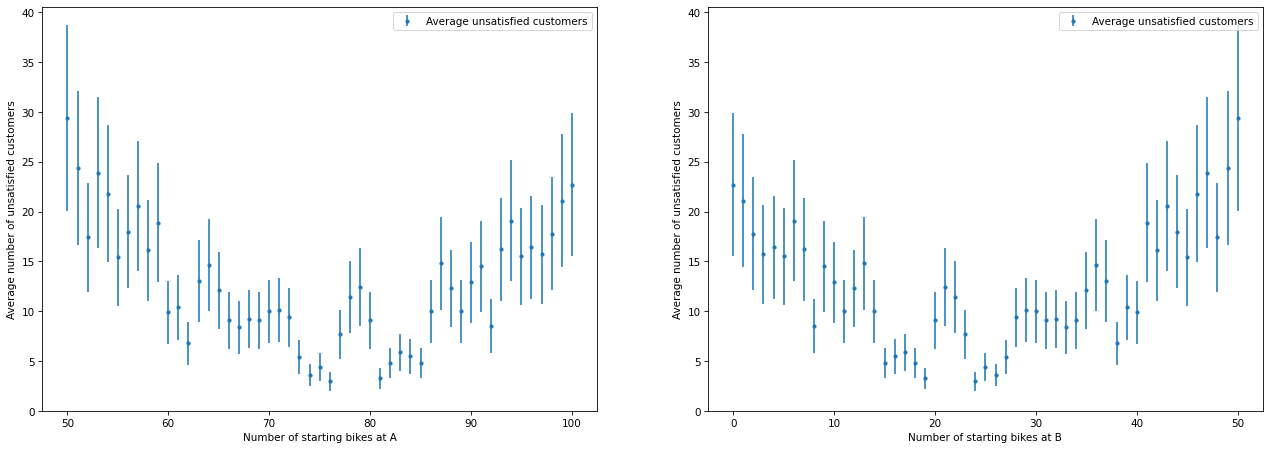

In [13]:
tu_avg_error = 1/np.sqrt(num_sims)*np.array(tu_avg)

fig, ax = plt.subplots(1,2,figsize=(21,7))

ax[0].errorbar(nstartA, tu_avg, tu_avg_error, fmt='.', label='Average unsatisfied customers')
ax[0].set_xlabel('Number of starting bikes at A')
ax[0].set_ylabel('Average number of unsatisfied customers')
ax[0].set_ylim(0)
ax[0].legend()
ax[1].errorbar(nstartB, tu_avg, tu_avg_error, fmt='.', label='Average unsatisfied customers')
ax[1].set_xlabel('Number of starting bikes at B')
ax[1].set_ylabel('Average number of unsatisfied customers')
ax[1].set_ylim(0)
ax[1].legend()

In [14]:
p_AB = 0.3
p_BA = 0.2
p_AC = 0.4
p_CA = 0.1
p_BC = 0.35
p_CB = 0.15

N_slots = 100

nstartA = []
nstartB = []
nstartC = []
tu_avg = []

num_sims = 100

N_start_C = 0

for N_start_A in range(70,N_slots+1-10,1):

        N_start_B = N_slots - N_start_A - N_start_C
        
        nstartA.append(N_start_A)
        nstartB.append(N_start_B)
        
        nstartC.append(N_start_C)

        print(N_start_A, N_start_B, N_start_C)

        tu_sum = 0
    
        for j in range(num_sims):
            bikeshare = State(A=N_start_A, B=N_start_B, C=N_start_C, A_empty=0, B_empty=0, C_empty=0)
            do_plot = False
            total_unsatisfied = run_simulation(bikeshare, p_AB, p_BA, p_AC, p_CA, p_BC, p_CB, 180, do_plot)

            #print("Total unsatisfied customers: ", j, total_unsatisfied)
            tu_sum += total_unsatisfied
    
        print("Average unsatisfied customers: ", tu_sum/(1.0*num_sims))
        tu_avg.append(tu_sum/(1.0*num_sims))
    


70 30 0
Average unsatisfied customers:  8.05
71 29 0
Average unsatisfied customers:  7.86
72 28 0
Average unsatisfied customers:  7.08
73 27 0
Average unsatisfied customers:  5.27
74 26 0
Average unsatisfied customers:  6.6
75 25 0
Average unsatisfied customers:  5.74
76 24 0
Average unsatisfied customers:  5.89
77 23 0
Average unsatisfied customers:  7.57
78 22 0
Average unsatisfied customers:  6.11
79 21 0
Average unsatisfied customers:  6.12
80 20 0
Average unsatisfied customers:  6.25
81 19 0
Average unsatisfied customers:  5.43
82 18 0
Average unsatisfied customers:  7.48
83 17 0
Average unsatisfied customers:  7.4
84 16 0
Average unsatisfied customers:  7.61
85 15 0
Average unsatisfied customers:  8.82
86 14 0
Average unsatisfied customers:  10.51
87 13 0
Average unsatisfied customers:  11.36
88 12 0
Average unsatisfied customers:  10.85
89 11 0
Average unsatisfied customers:  11.11
90 10 0
Average unsatisfied customers:  10.67


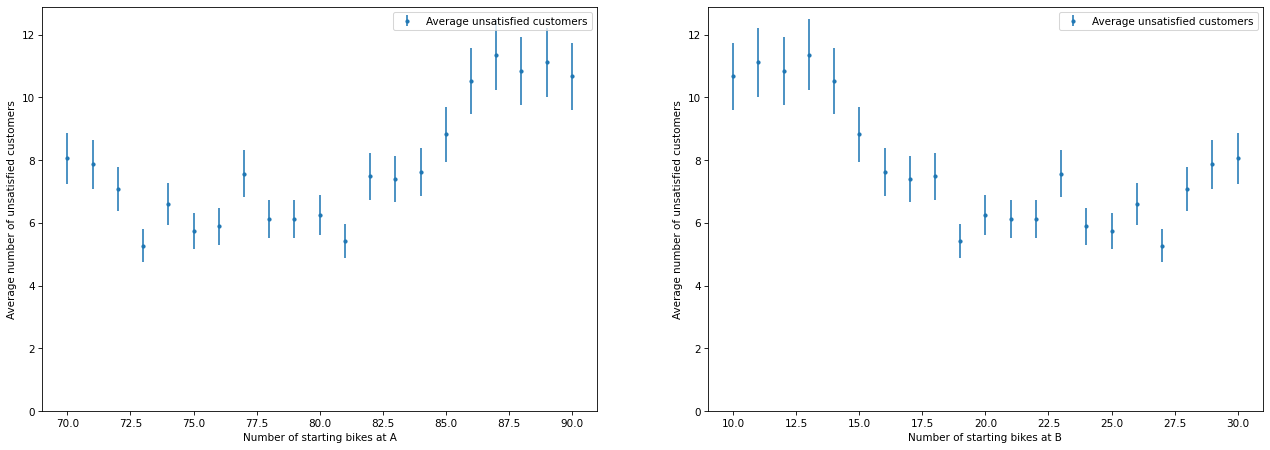

In [15]:
tu_avg_error = 1/np.sqrt(num_sims)*np.array(tu_avg)

fig, ax = plt.subplots(1,2,figsize=(21,7))

ax[0].errorbar(nstartA, tu_avg, tu_avg_error, fmt='.', label='Average unsatisfied customers')
ax[0].set_xlabel('Number of starting bikes at A')
ax[0].set_ylabel('Average number of unsatisfied customers')
ax[0].set_ylim(0)
ax[0].legend()
ax[1].errorbar(nstartB, tu_avg, tu_avg_error, fmt='.', label='Average unsatisfied customers')
ax[1].set_xlabel('Number of starting bikes at B')
ax[1].set_ylabel('Average number of unsatisfied customers')
ax[1].set_ylim(0)
ax[1].legend()

## Under the Hood

This section contains additional information about the functions we've used and pointers to their documentation.

You don't need to know anything in this section, so if you are already feeling overwhelmed, you might want to skip it.
But if you are curious, read on.

`State` and `TimeSeries` objects are based on the `Series` object defined by the Pandas library.
The documentation is at <https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html>.

`Series` objects provide their own `plot` function, which is why we call it like this:

```
results.plot()
```

Instead of like this:

```
plot(results)
```

You can read the documentation of `Series.plot` at <https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.plot.html>.

`decorate` is based on Matplotlib, which is a widely used plotting library for Python.  Matplotlib provides separate functions for `title`, `xlabel`, and `ylabel`.
`decorate` makes them a little easier to use.
For the list of keyword arguments you can pass to `decorate`, see <https://matplotlib.org/3.2.2/api/axes_api.html?highlight=axes#module-matplotlib.axes>.

The `flip` function uses NumPy's `random` function to generate a random number between 0 and 1, then returns `True` or `False` with the given probability.

You can get the source code for `flip` (or any other function) by running the following cell.

In [5]:
source_code(flip)

def flip(p=0.5):
    """Flips a coin with the given probability.

    p: float 0-1

    returns: boolean (True or False)
    """
    return np.random.random() < p
